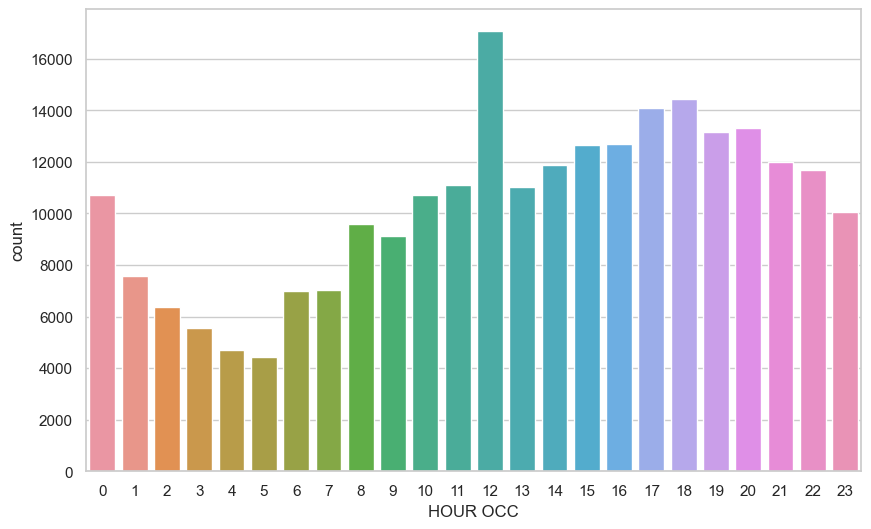

12


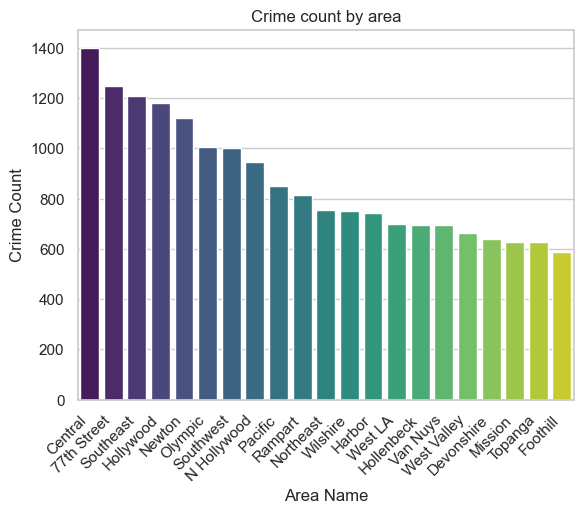

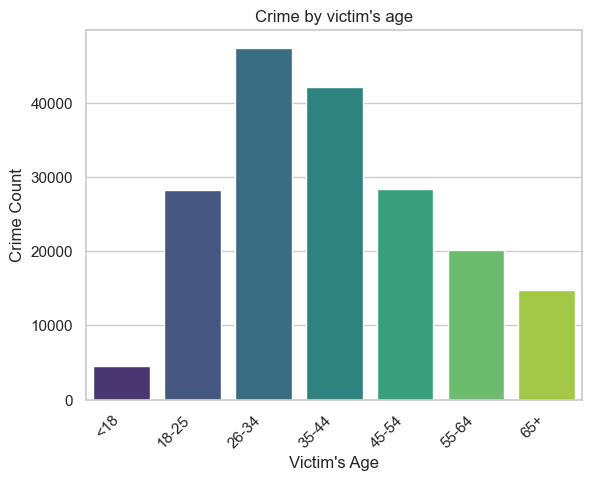

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))

crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? 
#   Save as a string variable called peak_night_crime_location.
# Identify the number of crimes committed against victims by age group (<18, 18-25, 26-34, 35-44, 45-54, 55-64, 65+). 
#    Save as a pandas Series called victim_ages.

crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2]
crimes["HOUR OCC"] = crimes["HOUR OCC"].astype(int)
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

crime_hour_df = crimes["HOUR OCC"].value_counts()
crime_hour_df = pd.DataFrame(crime_hour_df)

peak_crime_hour = int(crime_hour_df.index[0])

print(peak_crime_hour)

#Part2
#crimes["TIME OCC"] = crimes["TIME OCC"].astype(int)
ranges_to_check = [(22,23), (00,3)]
result = crimes["HOUR OCC"].apply(lambda x: any(start <= x <= end for start, end in ranges_to_check))

danger_hours = crimes[crimes["HOUR OCC"].isin(result)]
danger_zone = danger_hours["AREA NAME"].value_counts()
danger_zone_df = pd.DataFrame(danger_zone)

peak_night_crime_location = danger_zone_df.index[0]


ax = sns.barplot(data=danger_zone_df,
            x = danger_zone_df.index, y ="count",
            palette='viridis')
plt.xlabel('Area Name')
plt.ylabel('Crime Count')
plt.title('Crime count by area')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

#Part3 
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["<18", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
crimes["Age Bracket"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels)

victim_ages = crimes["Age Bracket"].value_counts()
victim_ages_df = pd.DataFrame(victim_ages)

ax2 = sns.barplot(data=victim_ages_df,
            x = victim_ages.index, y ="count",
            palette='viridis')
plt.xlabel("Victim's Age")
plt.ylabel('Crime Count')
plt.title("Crime by victim's age")

# Rotate x-axis labels
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()